In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit
import constants

In [53]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['font.size'] = 22

In [2]:
def processData(file_name):
    ''' data --> vectors '''
    file = open(file_name, 'r')
    processing = False
    x, y, data = [], [], []

    for line in file:
        if 'A004USERDEFINED' in line:
            processing = True
            continue
        
        if processing == True:
            cleaned = line.split()[1:]
            x = x + [int(cleaned[0]) + i for i in range(5)]
            y.extend(cleaned[1:])
        
    x = np.array(x)
    for i, item in enumerate(y):
        y[i] = int(item)
    y = np.array(y) # counts
    
    return x, y

In [3]:
def get_x_val(energy, m, b): 
    '''get the x index that matches the energy'''
    return int((energy-b)/(m))

In [73]:
def get_energy(channel):
    return (constants.CALIB_SLOPE*channel) + constants.CALIB_INT

## Visualize Data to help get peaks

In [57]:
data_file=constants.TB_FILE
x,y = processData(data_file)
m, b = constants.CALIB_SLOPE, constants.CALIB_INT

In [59]:
print(get_x_val(44482, m, b))

3132


(3057.0, 3207.0)

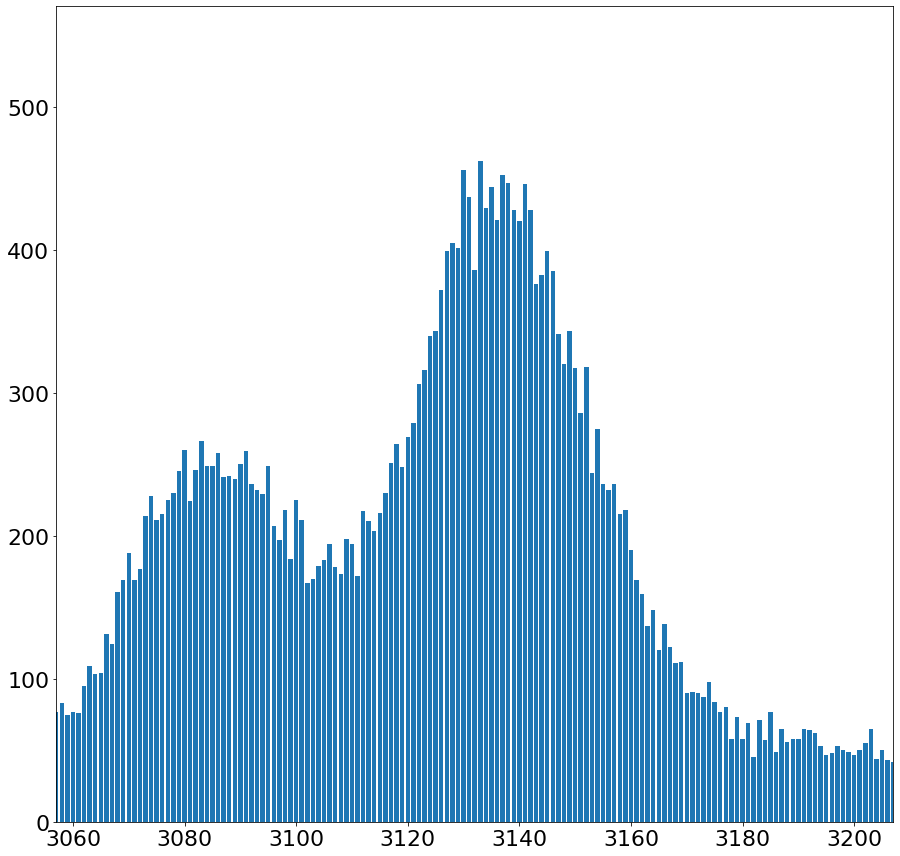

In [65]:
bounds = [3132-75, 3132+75]
plt.bar(x,y)
plt.xlim(bounds)

In [74]:
elements = [47, 56, 29, 42, 37, 65]
x = []
y = []

peaks = {'Ag': 1556,
         'Ba': 2267,
         'Cu': 566,
         'Mo': 1229,
         'Rb': 941,
         'Tb': 3136
        }

for i, mol in enumerate(peaks):
    peaks[mol] = {'peak': peaks[mol], 'Z': elements[i]}
    x.append(peaks[mol]['Z'])
    y.append(get_energy(peaks[mol]['peak']))

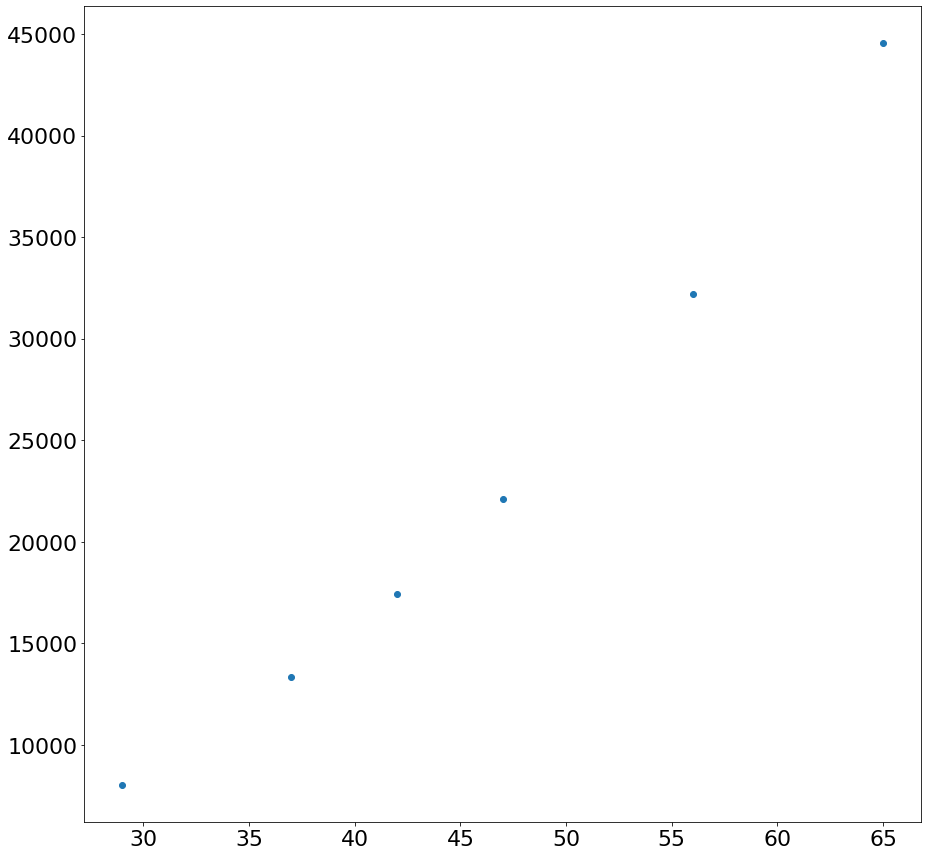

In [75]:
plt.scatter(x,y)